In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
!ls

CreditClassification-PROBLEM1.ipynb  submissison_Credit.csv
socgenCredit_test.csv		     train_socgenCredit.csv
submission.csv


In [3]:
TrainDataPath = './train_socgenCredit.csv'
TestDataPath = './socgenCredit_test.csv'

# Loading the Training and Test Dataset
TrainData = pd.read_csv(TrainDataPath)
TestData = pd.read_csv(TestDataPath)

In [158]:
print("Training Dataset Shape:")
print(TrainData.shape)
print("\n")
print("Training Dataset Columns/Features:")
print(TrainData.dtypes)
TrainData.head()

Training Dataset Shape:
(7417, 30)


Training Dataset Columns/Features:
S.No                           int64
Outcome                        int64
JA_SCORE                     float64
FR_SCORE                     float64
BWA_SCORE                    float64
GESAMT_SCORE                 float64
krf                           object
PD                           float64
Ertrag_marge                 float64
start_EAD                    float64
LGD_rest_Ecosfera_avg        float64
LGD_12_Ecosfera              float64
bonitaetsindex                 int64
std_krediturteil               int64
VC_umsatz                    float64
default                        int64
v_verlust_aug                float64
verlust                        int64
A_FLAG_NEUGESCHAEFT            int64
EIP_BLANKO                   float64
EIP_PBLANKO                  float64
EIP_BSG                      float64
EIP_PBSG                     float64
EIP_GESAMTENGA               float64
EIP_PROTONEUENGA             float64
EIP

,S.No,Outcome,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,krf,PD,Ertrag_marge,start_EAD,...,EIP_PBLANKO,EIP_BSG,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUENGA,EIP_PROTONEUSICHERHEITEN,EIP_EWB,V_VOTIERUNGSDATUM,SRK_LGD_rest_Ecosfera_avg,SRK_LGD_12_Ecosfera
0,4025,1,0.08636,0.06065,0.12565,0.04576,6,0.0628,3147.89,97360.94,...,1015494.98,0.0087,0.0164,1300000.00,97360.94,9736.09,0,24MAR2014:13:57:22.859000,0.016119,0.018047
1,3328,1,0.03031,0.02178,0.03006,0.02709,5,0.0276,30413.31,864000.00,...,96005.30,1.1335,0.9386,1635849.97,0.00,0.00,0,17DEC2015:10:57:44.809000,0.001045,0.001861
2,3152,1,0.01203,0.12523,0.01584,0.05491,7+,0.1101,9214.00,210000.00,...,31817.53,0.9181,0.9181,388547.03,210000.00,147000.00,0,07MAY2014:10:22:17.362000,0.019492,0.023763
3,6879,1,0.06280,0.07029,0.00000,0.04874,6-,0.0834,0.00,0.00,...,0.00,0.0000,0.0000,740000.00,0.00,0.00,0,30DEC2015:09:58:32.782000,0.000000,0.000000
4,2952,1,0.00994,0.12523,0.01851,0.05483,7+,0.1101,715.21,21700.00,...,28879.54,0.7820,0.6742,330827.07,21700.00,13801.20,0,27SEP2012:09:33:57.120000,0.003093,0.001744


In [159]:
print("Test Dataset Shape:")
print(TestData.shape)
print("\n")
print("Test Dataset Columns/Features:")
print(TestData.dtypes)
TestData.head()

Test Dataset Shape:
(3179, 29)


Test Dataset Columns/Features:
S.No                           int64
JA_SCORE                     float64
FR_SCORE                     float64
BWA_SCORE                    float64
GESAMT_SCORE                 float64
krf                           object
PD                           float64
Ertrag_marge                 float64
start_EAD                    float64
LGD_rest_Ecosfera_avg        float64
LGD_12_Ecosfera              float64
bonitaetsindex                 int64
std_krediturteil               int64
VC_umsatz                    float64
default                        int64
v_verlust_aug                float64
verlust                        int64
A_FLAG_NEUGESCHAEFT            int64
EIP_BLANKO                   float64
EIP_PBLANKO                  float64
EIP_BSG                      float64
EIP_PBSG                     float64
EIP_GESAMTENGA               float64
EIP_PROTONEUENGA             float64
EIP_PROTONEUSICHERHEITEN     float64
EIP_EWB    

,S.No,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,krf,PD,Ertrag_marge,start_EAD,LGD_rest_Ecosfera_avg,...,EIP_PBLANKO,EIP_BSG,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUENGA,EIP_PROTONEUSICHERHEITEN,EIP_EWB,V_VOTIERUNGSDATUM,SRK_LGD_rest_Ecosfera_avg,SRK_LGD_12_Ecosfera
0,3,0.03116,0.05244,0.05787,0.04598,6,0.0628,0.0,0.0,0.0,...,0.00,1.4840,0.0000,535000.00,0.0,0.0,0,05MAY2010:14:19:27.688000,0.0,0.0
1,4,0.01527,0.04165,0.06372,0.03763,6+,0.0473,0.0,0.0,0.0,...,617350.33,0.6322,0.6322,1678696.62,84370.0,59059.0,0,12MAY2010:14:25:55.280000,0.0,0.0
2,6,0.02419,0.05244,0.02564,0.03502,6+,0.0473,0.0,0.0,0.0,...,76975.41,0.9225,0.8878,690444.27,203970.0,152977.5,0,12MAY2010:14:52:46.429000,0.0,0.0
3,13,0.00313,0.05329,0.08713,0.04353,6,0.0628,0.0,0.0,0.0,...,0.00,0.7810,0.0000,267266.79,200000.0,130000.0,0,14JUN2010:13:44:01.932000,0.0,0.0
4,18,0.00299,0.03341,0.05120,0.02678,5,0.0276,0.0,0.0,0.0,...,0.00,0.0000,0.0000,450000.00,0.0,0.0,0,21JUN2010:15:11:39.716000,0.0,0.0


In [160]:
# Now Checking For Any Missing Values
print("Training Dataset Missing Value Columns:")
print(TrainData.isnull().sum())
print("\n")
print("Test Dataset Missing Value Columns:")
print(TestData.isnull().sum())

Training Dataset Missing Value Columns:
S.No                         0
Outcome                      0
JA_SCORE                     0
FR_SCORE                     0
BWA_SCORE                    0
GESAMT_SCORE                 0
krf                          0
PD                           0
Ertrag_marge                 0
start_EAD                    0
LGD_rest_Ecosfera_avg        0
LGD_12_Ecosfera              0
bonitaetsindex               0
std_krediturteil             0
VC_umsatz                    0
default                      0
v_verlust_aug                0
verlust                      0
A_FLAG_NEUGESCHAEFT          0
EIP_BLANKO                   0
EIP_PBLANKO                  0
EIP_BSG                      0
EIP_PBSG                     0
EIP_GESAMTENGA               0
EIP_PROTONEUENGA             0
EIP_PROTONEUSICHERHEITEN     0
EIP_EWB                      0
V_VOTIERUNGSDATUM            0
SRK_LGD_rest_Ecosfera_avg    0
SRK_LGD_12_Ecosfera          0
dtype: int64


Test Dataset Mi

In [161]:
import matplotlib.pyplot as plt

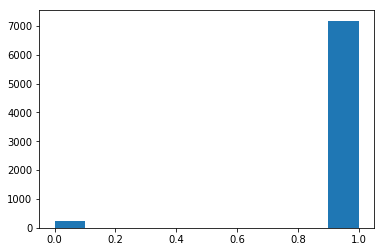

In [162]:
plt.hist(TrainData['Outcome'])
plt.show()

In [163]:
TrainData.describe()

,S.No,Outcome,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,PD,Ertrag_marge,start_EAD,LGD_rest_Ecosfera_avg,...,EIP_BLANKO,EIP_PBLANKO,EIP_BSG,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUENGA,EIP_PROTONEUSICHERHEITEN,EIP_EWB,SRK_LGD_rest_Ecosfera_avg,SRK_LGD_12_Ecosfera
count,7417.000000,7417.000000,7417.000000,7417.000000,7417.000000,7417.000000,7417.000000,7417.000000,7.417000e+03,7417.000000,...,7.417000e+03,7.417000e+03,7417.000000,7417.000000,7.417000e+03,7.417000e+03,7.417000e+03,7417.0,7417.000000,7417.000000
mean,5259.912363,0.968316,0.042376,0.110222,0.052712,0.069093,0.071411,4734.704265,1.339280e+05,0.063560,...,2.571407e+05,1.255967e+05,0.865909,0.521033,1.333864e+06,1.225063e+05,7.875373e+04,0.0,0.004499,0.005169
std,3061.218925,0.175169,0.030735,0.077436,0.046413,0.042649,0.049871,9651.009214,2.805008e+05,0.071256,...,8.166679e+05,3.955338e+05,3.040377,2.954352,3.774124e+06,2.621123e+05,1.810847e+05,0.0,0.007486,0.008401
min,1.000000,0.000000,0.001720,0.003400,0.000000,0.004610,0.003400,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
25%,2614.000000,1.000000,0.017350,0.046790,0.013390,0.036540,0.027600,0.000000,0.000000e+00,0.000000,...,2.854425e+04,0.000000e+00,0.662000,0.000000,3.758955e+05,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
50%,5242.000000,1.000000,0.035740,0.094710,0.042380,0.056980,0.062800,1784.150000,6.316000e+04,0.038020,...,7.845771e+04,2.017470e+03,0.814000,0.537000,6.208907e+05,5.310375e+04,2.209229e+04,0.0,0.001854,0.002243
75%,7896.000000,1.000000,0.060890,0.160220,0.083370,0.098680,0.110100,5703.380000,1.700000e+05,0.116350,...,1.920077e+05,9.624062e+04,0.910200,0.831000,1.087956e+06,1.580000e+05,9.860932e+04,0.0,0.004503,0.005278
max,10596.000000,1.000000,0.177190,0.313080,0.214120,0.192600,0.187200,125297.700000,4.996400e+06,0.426700,...,1.411520e+07,5.807751e+06,95.621500,95.621500,6.200000e+07,4.996400e+06,3.468864e+06,0.0,0.056388,0.062544


In [164]:
TrainData.corr()

,S.No,Outcome,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,PD,Ertrag_marge,start_EAD,LGD_rest_Ecosfera_avg,...,EIP_BLANKO,EIP_PBLANKO,EIP_BSG,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUENGA,EIP_PROTONEUSICHERHEITEN,EIP_EWB,SRK_LGD_rest_Ecosfera_avg,SRK_LGD_12_Ecosfera
S.No,1.000000,0.003961,0.019708,0.186709,0.101485,0.110799,-0.019485,0.006128,0.008289,0.033546,...,-0.001248,0.001020,0.001564,-0.000289,-0.007198,-0.003539,-0.002637,NaN,0.016173,0.013809
Outcome,0.003961,1.000000,-0.087295,-0.011742,-0.029960,-0.044953,-0.100490,-0.044319,-0.027419,0.008721,...,-0.013449,-0.004943,0.012271,0.009565,-0.004260,-0.039810,-0.022875,NaN,-0.025748,-0.030884
JA_SCORE,0.019708,-0.087295,1.000000,0.089759,0.103487,0.183026,0.360434,0.005180,0.001891,-0.029110,...,-0.031373,-0.018406,0.007131,0.001729,-0.007555,-0.000983,0.008135,NaN,0.147004,0.150796
FR_SCORE,0.186709,-0.011742,0.089759,1.000000,0.339992,0.477517,0.523939,0.002616,0.001169,-0.021583,...,-0.000465,-0.049710,-0.045347,-0.033782,0.004410,0.044174,0.052677,NaN,0.301307,0.301509
BWA_SCORE,0.101485,-0.029960,0.103487,0.339992,1.000000,0.332532,0.353468,0.027916,0.043633,-0.188847,...,0.008577,-0.012170,-0.026384,-0.019568,0.015783,0.104768,0.107185,NaN,0.040989,0.043522
GESAMT_SCORE,0.110799,-0.044953,0.183026,0.477517,0.332532,1.000000,0.550833,0.010323,0.010072,-0.049823,...,-0.003152,-0.034980,-0.032492,-0.022718,-0.004183,0.041675,0.049196,NaN,0.267592,0.267808
PD,-0.019485,-0.100490,0.360434,0.523939,0.353468,0.550833,1.000000,0.059667,0.042327,-0.011319,...,0.001492,-0.038351,-0.038166,-0.025006,-0.018419,0.070037,0.079253,NaN,0.508726,0.506826
Ertrag_marge,0.006128,-0.044319,0.005180,0.002616,0.027916,0.010323,0.059667,1.000000,0.882809,0.127265,...,0.194662,0.328837,-0.016542,-0.009420,0.103699,0.692562,0.668211,NaN,0.091062,0.103567
start_EAD,0.008289,-0.027419,0.001891,0.001169,0.043633,0.010072,0.042327,0.882809,1.000000,0.068398,...,0.221290,0.405545,-0.015841,-0.003366,0.211584,0.867194,0.845436,NaN,0.040866,0.051321
LGD_rest_Ecosfera_avg,0.033546,0.008721,-0.029110,-0.021583,-0.188847,-0.049823,-0.011319,0.127265,0.068398,1.000000,...,-0.022896,-0.035058,-0.028808,-0.024978,-0.097438,-0.007514,-0.029171,NaN,0.678786,0.653324


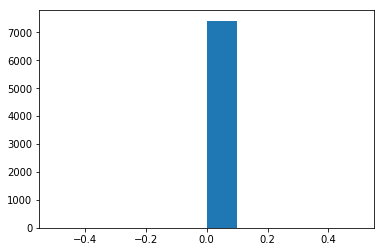

In [165]:
plt.hist(TrainData['EIP_EWB'])
plt.show()

In [166]:
import seaborn as sns

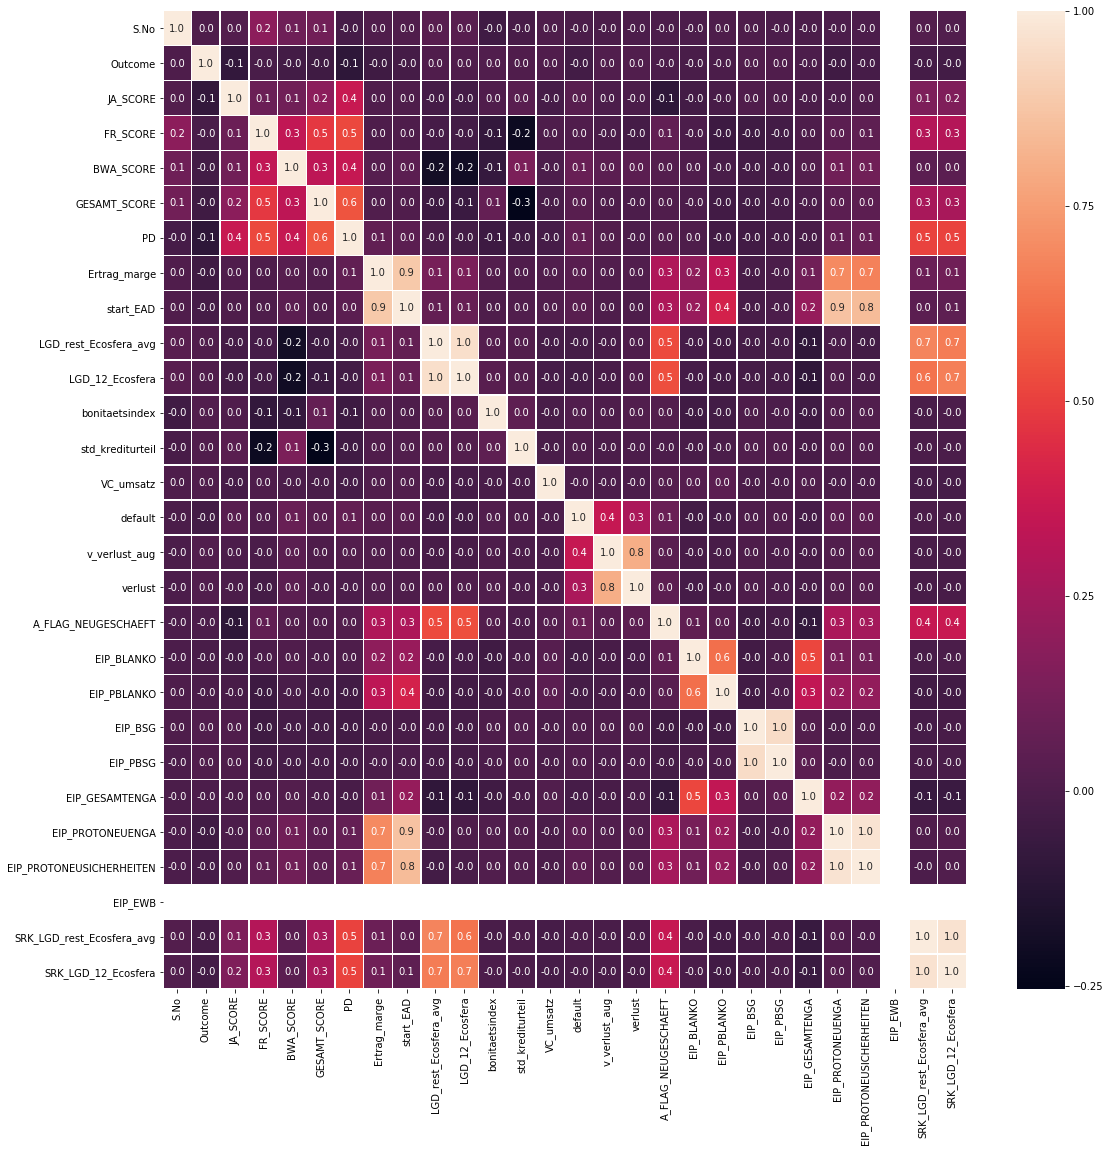

In [167]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(TrainData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [168]:
TrainData.columns

Index(['S.No', 'Outcome', 'JA_SCORE', 'FR_SCORE', 'BWA_SCORE', 'GESAMT_SCORE',
       'krf', 'PD', 'Ertrag_marge', 'start_EAD', 'LGD_rest_Ecosfera_avg',
       'LGD_12_Ecosfera', 'bonitaetsindex', 'std_krediturteil', 'VC_umsatz',
       'default', 'v_verlust_aug', 'verlust', 'A_FLAG_NEUGESCHAEFT',
       'EIP_BLANKO', 'EIP_PBLANKO', 'EIP_BSG', 'EIP_PBSG', 'EIP_GESAMTENGA',
       'EIP_PROTONEUENGA', 'EIP_PROTONEUSICHERHEITEN', 'EIP_EWB',
       'V_VOTIERUNGSDATUM', 'SRK_LGD_rest_Ecosfera_avg',
       'SRK_LGD_12_Ecosfera'],
      dtype='object')

In [169]:
Test_sn = TestData['S.No']

In [170]:
TrainData = TrainData.drop(['LGD_12_Ecosfera','EIP_BSG','SRK_LGD_12_Ecosfera', 'EIP_PROTONEUENGA','EIP_EWB', 'S.No'], axis=1)
TestData = TestData.drop(['LGD_12_Ecosfera','EIP_BSG','SRK_LGD_12_Ecosfera', 'EIP_PROTONEUENGA','EIP_EWB', 'S.No'], axis=1)

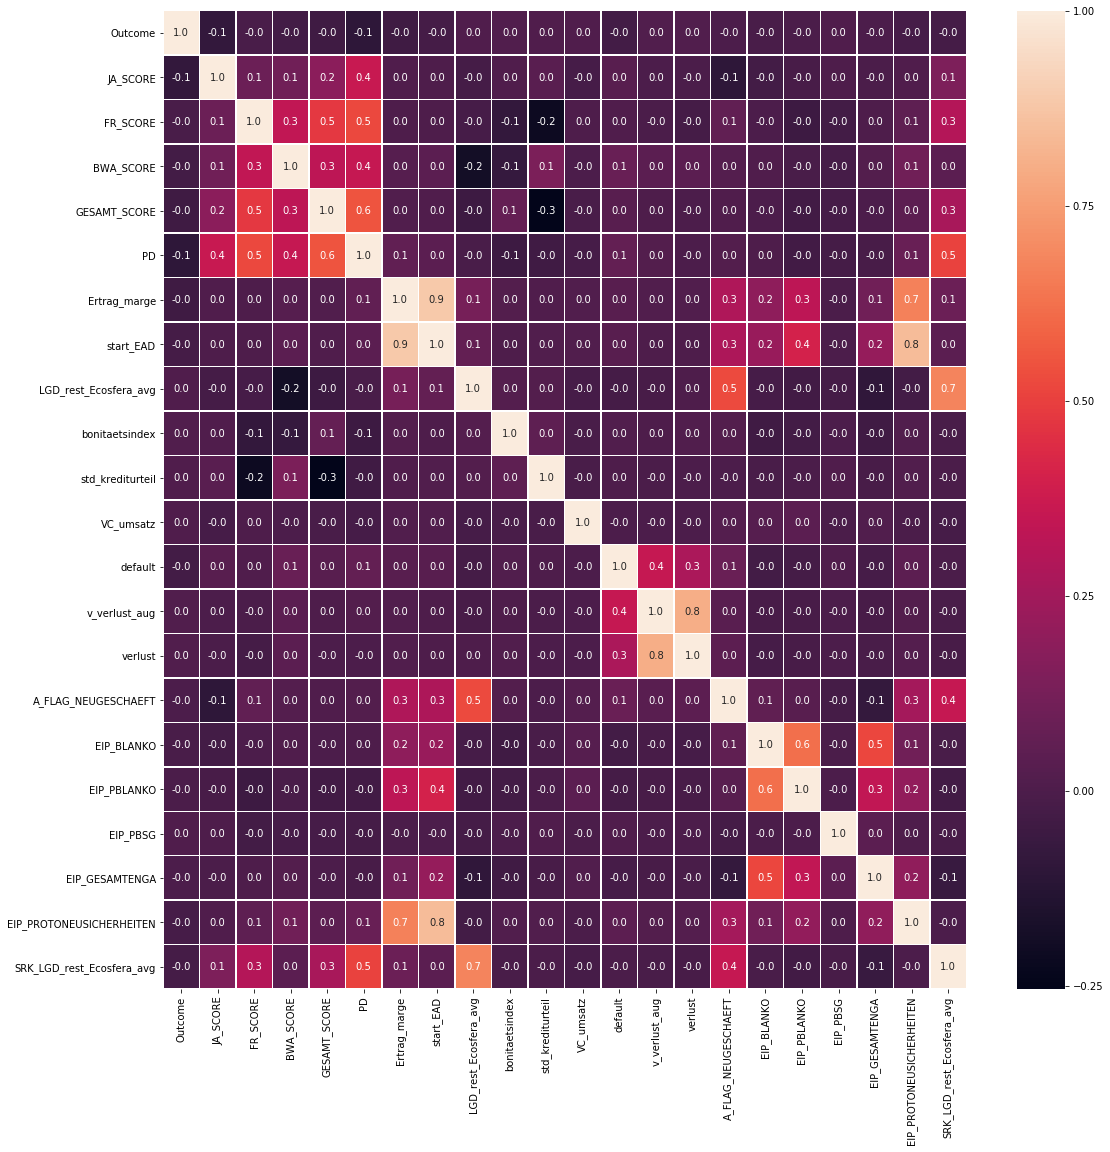

In [171]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(TrainData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

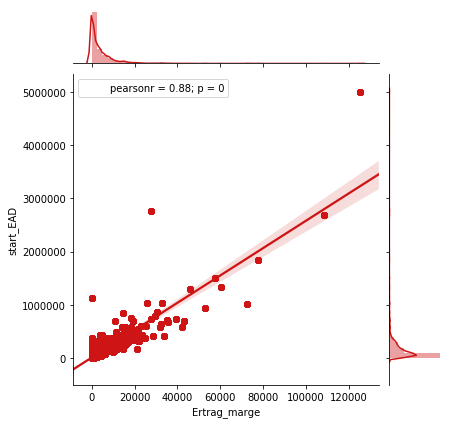

In [172]:
sns.jointplot(TrainData.loc[:,'Ertrag_marge'], TrainData.loc[:,'start_EAD'], kind="regg", color="#ce1414")

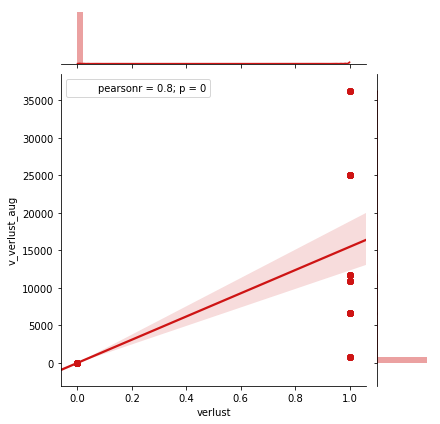

In [173]:
sns.jointplot(TrainData.loc[:,'verlust'], TrainData.loc[:,'v_verlust_aug'], kind="regg", color="#ce1414")

In [174]:
TrainData.shape

(7417, 24)

In [175]:
TestData.shape

(3179, 23)

In [176]:
# From this I will get to know what are different categories of type, pf_category and currency
print("Different krf in train and test dataset: ")
print(TrainData['krf'].unique())
print(TestData['krf'].unique())

Different krf in train and test dataset: 
['6' '5' '7+' '6-' '4-' '4+' '6+' '7-' '5+' '5-' '7' '3+' '4' '3-' '3' '2-'
 '2' '2+' '1']
['6' '6+' '5' '7+' '6-' '5+' '7' '7-' '5-' '4-' '4' '3' '4+' '3+' '1' '3-'
 '2+' '2' '2-']


In [177]:
TrainData.describe()

,Outcome,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,PD,Ertrag_marge,start_EAD,LGD_rest_Ecosfera_avg,bonitaetsindex,...,default,v_verlust_aug,verlust,A_FLAG_NEUGESCHAEFT,EIP_BLANKO,EIP_PBLANKO,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUSICHERHEITEN,SRK_LGD_rest_Ecosfera_avg
count,7417.000000,7417.000000,7417.000000,7417.000000,7417.000000,7417.000000,7417.000000,7.417000e+03,7417.000000,7417.000000,...,7417.000000,7417.000000,7417.000000,7417.000000,7.417000e+03,7.417000e+03,7417.000000,7.417000e+03,7.417000e+03,7417.000000
mean,0.968316,0.042376,0.110222,0.052712,0.069093,0.071411,4734.704265,1.339280e+05,0.063560,215.553323,...,0.020898,102.172694,0.006606,0.742618,2.571407e+05,1.255967e+05,0.521033,1.333864e+06,7.875373e+04,0.004499
std,0.175169,0.030735,0.077436,0.046413,0.042649,0.049871,9651.009214,2.805008e+05,0.071256,49.085816,...,0.143052,1566.606534,0.081017,0.437221,8.166679e+05,3.955338e+05,2.954352,3.774124e+06,1.810847e+05,0.007486
min,0.000000,0.001720,0.003400,0.000000,0.004610,0.003400,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,0.017350,0.046790,0.013390,0.036540,0.027600,0.000000,0.000000e+00,0.000000,196.000000,...,0.000000,0.000000,0.000000,0.000000,2.854425e+04,0.000000e+00,0.000000,3.758955e+05,0.000000e+00,0.000000
50%,1.000000,0.035740,0.094710,0.042380,0.056980,0.062800,1784.150000,6.316000e+04,0.038020,214.000000,...,0.000000,0.000000,0.000000,1.000000,7.845771e+04,2.017470e+03,0.537000,6.208907e+05,2.209229e+04,0.001854
75%,1.000000,0.060890,0.160220,0.083370,0.098680,0.110100,5703.380000,1.700000e+05,0.116350,246.000000,...,0.000000,0.000000,0.000000,1.000000,1.920077e+05,9.624062e+04,0.831000,1.087956e+06,9.860932e+04,0.004503
max,1.000000,0.177190,0.313080,0.214120,0.192600,0.187200,125297.700000,4.996400e+06,0.426700,386.000000,...,1.000000,36193.180000,1.000000,1.000000,1.411520e+07,5.807751e+06,95.621500,6.200000e+07,3.468864e+06,0.056388


In [178]:
TrainData.head()

,Outcome,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,krf,PD,Ertrag_marge,start_EAD,LGD_rest_Ecosfera_avg,...,v_verlust_aug,verlust,A_FLAG_NEUGESCHAEFT,EIP_BLANKO,EIP_PBLANKO,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUSICHERHEITEN,V_VOTIERUNGSDATUM,SRK_LGD_rest_Ecosfera_avg
0,1,0.08636,0.06065,0.12565,0.04576,6,0.0628,3147.89,97360.94,0.25666,...,0.0,0,1,926896.52,1015494.98,0.0164,1300000.00,9736.09,24MAR2014:13:57:22.859000,0.016119
1,1,0.03031,0.02178,0.03006,0.02709,5,0.0276,30413.31,864000.00,0.03786,...,0.0,0,1,0.00,96005.30,0.9386,1635849.97,0.00,17DEC2015:10:57:44.809000,0.001045
2,1,0.01203,0.12523,0.01584,0.05491,7+,0.1101,9214.00,210000.00,0.17704,...,0.0,0,1,31817.53,31817.53,0.9181,388547.03,147000.00,07MAY2014:10:22:17.362000,0.019492
3,1,0.06280,0.07029,0.00000,0.04874,6-,0.0834,0.00,0.00,0.00000,...,0.0,0,0,0.00,0.00,0.0000,740000.00,0.00,30DEC2015:09:58:32.782000,0.000000
4,1,0.00994,0.12523,0.01851,0.05483,7+,0.1101,715.21,21700.00,0.02809,...,0.0,0,1,72114.49,28879.54,0.6742,330827.07,13801.20,27SEP2012:09:33:57.120000,0.003093


In [179]:
y_train = TrainData['Outcome']
x_train = TrainData.drop(['V_VOTIERUNGSDATUM', 'krf', 'Outcome'], axis=1)

In [180]:
x_test = TestData.drop(['V_VOTIERUNGSDATUM', 'krf'], axis=1)

In [181]:
x_train.shape

(7417, 21)

In [182]:
x_test.shape

(3179, 21)

In [183]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
JA_SCORE,7417.0,4.237633e-02,3.073497e-02,0.00172,0.01735,3.574000e-02,6.089000e-02,1.771900e-01
FR_SCORE,7417.0,1.102221e-01,7.743555e-02,0.00340,0.04679,9.471000e-02,1.602200e-01,3.130800e-01
BWA_SCORE,7417.0,5.271210e-02,4.641267e-02,0.00000,0.01339,4.238000e-02,8.337000e-02,2.141200e-01
GESAMT_SCORE,7417.0,6.909349e-02,4.264940e-02,0.00461,0.03654,5.698000e-02,9.868000e-02,1.926000e-01
PD,7417.0,7.141056e-02,4.987084e-02,0.00340,0.02760,6.280000e-02,1.101000e-01,1.872000e-01
Ertrag_marge,7417.0,4.734704e+03,9.651009e+03,0.00000,0.00000,1.784150e+03,5.703380e+03,1.252977e+05
start_EAD,7417.0,1.339280e+05,2.805008e+05,0.00000,0.00000,6.316000e+04,1.700000e+05,4.996400e+06
LGD_rest_Ecosfera_avg,7417.0,6.356014e-02,7.125580e-02,0.00000,0.00000,3.802000e-02,1.163500e-01,4.267000e-01
bonitaetsindex,7417.0,2.155533e+02,4.908582e+01,0.00000,196.00000,2.140000e+02,2.460000e+02,3.860000e+02
std_krediturteil,7417.0,1.926898e+01,1.303025e+01,0.00000,11.00000,2.100000e+01,3.100000e+01,4.100000e+01


In [184]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()

In [130]:
X_train = scaler.fit_transform(x_train)

In [131]:
X_train.shape

(7417, 21)

In [132]:
X_test = scaler.fit_transform(x_test)

In [133]:
X_test.shape

(3179, 21)

In [185]:
import xgboost as xgb

In [186]:
clf = xgb.XGBClassifier(n_estimators=170, max_depth=4, seed=1729) #98.879
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=170, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1729, silent=True, subsample=1)

In [187]:
pred = clf.predict(x_test)

In [188]:
from IPython.display import FileLink
sub = pd.DataFrame({'S.No': Test_sn, 'Outcome': pred})
filename = 'submissison_Credit.csv'
sub.to_csv(filename, index=False, columns=['S.No', 'Outcome'])
FileLink(filename)  

/home/sparsh/Desktop/BrainWaves-Round2(Team-Inflorescence)/hackathon_data/Q1/participant_folder/submissison_Credit.csv

In [143]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='f1')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 20
Best features : Index(['JA_SCORE', 'FR_SCORE', 'BWA_SCORE', 'GESAMT_SCORE', 'PD',
       'Ertrag_marge', 'start_EAD', 'LGD_rest_Ecosfera_avg', 'bonitaetsindex',
       'std_krediturteil', 'VC_umsatz', 'default', 'verlust',
       'A_FLAG_NEUGESCHAEFT', 'EIP_BLANKO', 'EIP_PBLANKO', 'EIP_PBSG',
       'EIP_GESAMTENGA', 'EIP_PROTONEUSICHERHEITEN',
       'SRK_LGD_rest_Ecosfera_avg'],
      dtype='object')


In [144]:
pred = rfecv.predict(X_test)

In [145]:
from IPython.display import FileLink
sub = pd.DataFrame({'S.No': Test_sn, 'Outcome': pred})
filename = 'submissison_Credit.csv'
sub.to_csv(filename, index=False, columns=['S.No', 'Outcome'])
FileLink(filename) 

/home/sparsh/Desktop/BrainWaves-Round2(Team-Inflorescence)/hackathon_data/Q1/participant_folder/submissison_Credit.csv

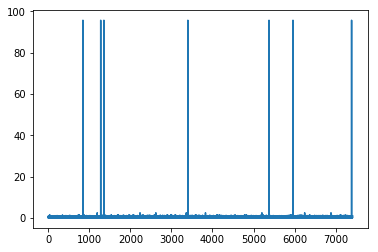

In [153]:
plt.plot(TrainData['EIP_PBSG'])

In [154]:
TrainData[TrainData['Outcome'] == 0]

,S.No,Outcome,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,krf,PD,Ertrag_marge,start_EAD,...,EIP_PBLANKO,EIP_BSG,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUENGA,EIP_PROTONEUSICHERHEITEN,EIP_EWB,V_VOTIERUNGSDATUM,SRK_LGD_rest_Ecosfera_avg,SRK_LGD_12_Ecosfera
16,4323,0,0.11162,0.03616,0.04434,0.03664,6+,0.0473,7700.60,179000.0,...,0.00,0.7831,0.0000,472250.26,179000.0,134250.00,0,22JUL2016:12:52:53.065000,0.007318,0.010049
99,10486,0,0.03516,0.01497,0.00000,0.02527,5,0.0276,0.00,0.0,...,0.00,0.0000,0.0000,500000.00,0.0,0.00,0,07JUN2016:15:11:14.376000,0.000000,0.000000
143,7621,0,0.09818,0.23678,0.08868,0.14699,7+,0.1101,0.00,0.0,...,87436.31,0.6997,0.6997,406000.00,0.0,0.00,0,23OCT2014:10:18:48.928000,0.000000,0.000000
155,8987,0,0.00688,0.21609,0.06293,0.11090,6,0.0628,0.00,0.0,...,207029.61,0.6602,0.6783,3000000.00,0.0,0.00,0,12AUG2011:14:38:40.436000,0.000000,0.000000
165,10504,0,0.04388,0.03616,0.02702,0.03664,6+,0.0473,7700.60,179000.0,...,0.00,0.7831,0.0000,472250.26,179000.0,134250.00,0,22JUL2016:12:52:53.065000,0.007318,0.010049
188,2896,0,0.00851,0.06755,0.03109,0.03623,6+,0.0473,1133.42,28740.0,...,0.00,0.6553,0.0000,298935.02,28740.0,19190.00,0,02MAR2012:11:05:31.898000,0.002113,0.002556
250,8695,0,0.07697,0.06605,0.12066,0.02631,5,0.0276,0.00,90000.0,...,117282.81,0.8266,0.8266,676286.05,90000.0,9000.00,0,30MAR2010:16:38:19.341000,0.002607,0.002791
254,3009,0,0.10500,0.09471,0.05120,0.08721,7-,0.1872,16729.54,310000.0,...,0.00,0.9882,0.0000,310000.00,310000.0,0.00,0,28MAR2013:12:54:49.306000,0.008359,0.008737
273,5010,0,0.06280,0.28256,0.00000,0.16701,7-,0.1872,7264.62,205000.0,...,0.00,0.8351,0.0000,384609.63,205000.0,153750.00,0,09MAR2015:16:05:39.012000,0.020059,0.029695
275,6776,0,0.06280,0.28256,0.00000,0.07844,7-,0.1872,7264.62,205000.0,...,0.00,0.8351,0.0000,384609.63,205000.0,153750.00,0,09MAR2015:16:05:39.012000,0.020059,0.029695


In [ ]:
#